In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
base_dir = 'Combined'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
headers = None

##### Getting the train data

In [4]:
X_train = []
y_train = []

for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        for file_name in os.listdir(category_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(category_path, file_name)
                if headers is None:
                    headers = pd.read_csv(file_path, nrows=1).columns.tolist()
                df = pd.read_csv(file_path)
                X_train.append(df.values)
                y_train.extend([category] * len(df))

X_train = np.vstack(X_train)
y_train = np.array(y_train)

##### Getting the test data

In [5]:
X_test = []
y_test = []

for category in os.listdir(test_dir):
    category_path = os.path.join(test_dir, category)
    if os.path.isdir(category_path):
        for file_name in os.listdir(category_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(category_path, file_name)
                if headers is None:
                    headers = pd.read_csv(file_path, nrows=1).columns.tolist()
                df = pd.read_csv(file_path)
                X_test.append(df.values) 
                y_test.extend([category] * len(df)) 

X_test = np.vstack(X_test)
y_test = np.array(y_test) 

In [6]:
print("Headers: ", headers)
print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape) 
print("Training labels shape: ", y_train.shape)
print("Testing labels shape: ", y_test.shape)

Headers:  ['accx', 'accy', 'accz']
Training data shape:  (470528, 3)
Testing data shape:  (188608, 3)
Training labels shape:  (470528,)
Testing labels shape:  (188608,)


## Q1

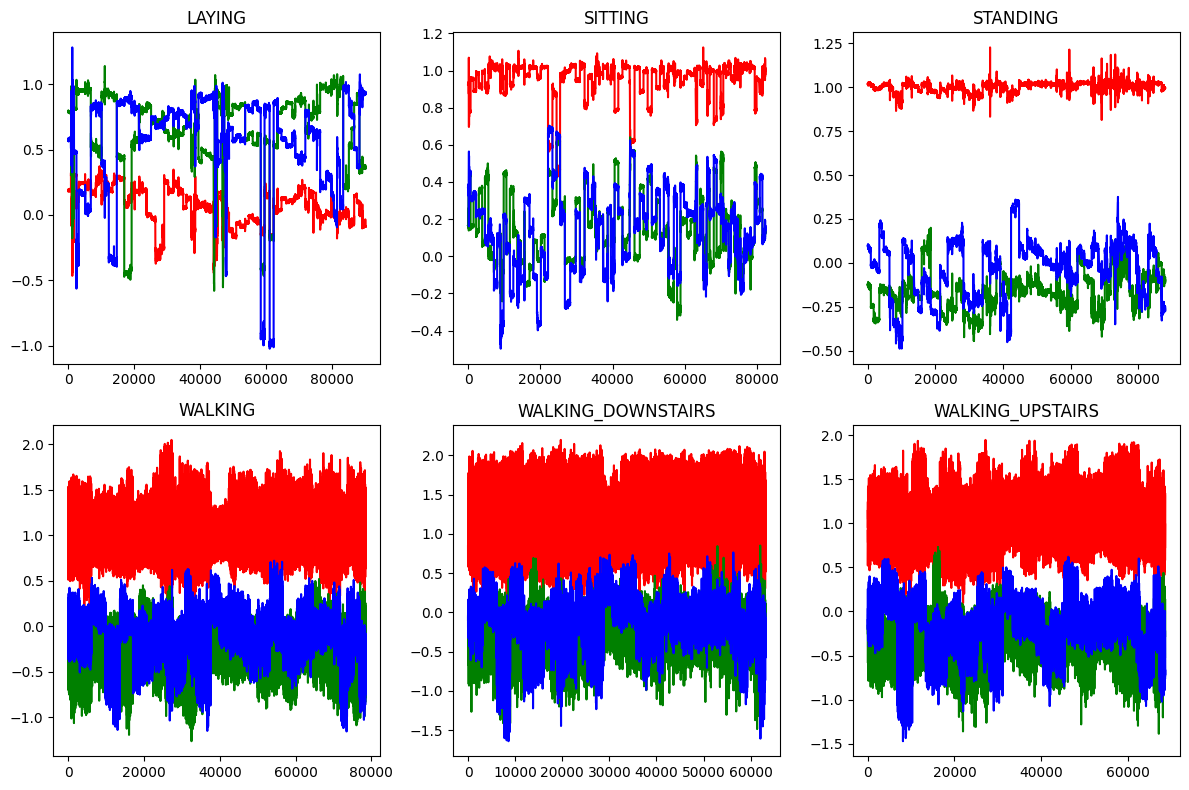

In [29]:
activity_classes = np.unique(y_train)

color_accx = 'red'
color_accy = 'green'
color_accz = 'blue'

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i in range(len(activity_classes)):
    waveform = X_train[y_train == activity_classes[i]]
    row = i // 3
    col = i % 3
    axes[row, col].plot(waveform[:, 0], label='accx', color=color_accx)
    axes[row, col].plot(waveform[:, 1], label='accy', color=color_accy)
    axes[row, col].plot(waveform[:, 2], label='accz', color=color_accz)
    axes[row, col].set_title(activity_classes[i])

plt.tight_layout()
plt.show()